## Data Cleaning Notebook

In order to get insights from the given data frame, in this first step, some cleaning will be done. Summary: eliminating the null values, identifying outiers, finding correlation, etc.

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

In [2]:
df=pd.read_csv('archive/attacks.csv', encoding='latin1')

df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [3]:
dim_orig=df.shape
dim_orig

(25723, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [5]:
df.columns=[c.lower().replace(' ', '_') for c in df.columns] 
df.columns=[c.lower().replace('.', '_') for c in df.columns] 
df.columns=[c.lower().replace(':', '') for c in df.columns] 
df.columns=[c.lower().replace('/', 'O') for c in df.columns] 
df.columns=[c.lower().replace('(', '') for c in df.columns] 
df.columns=[c.lower().replace(')', '') for c in df.columns] 

df.head()

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_yon,time,species_,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [6]:
df.head()

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_yon,time,species_,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [7]:
nan_cols=df.isnull().sum()
nan_cols[nan_cols>0]     # all of the columns have null values.

case_number               17021
date                      19421
year                      19423
type                      19425
country                   19471
area                      19876
location                  19961
activity                  19965
name                      19631
sex_                      19986
age                       22252
injury                    19449
fatal_yon                 19960
time                      22775
species_                  22259
investigator_or_source    19438
pdf                       19421
href_formula              19422
href                      19421
case_number_1             19421
case_number_2             19421
original_order            19414
unnamed_22                25722
unnamed_23                25721
dtype: int64

In [8]:
df_orig=df.copy()

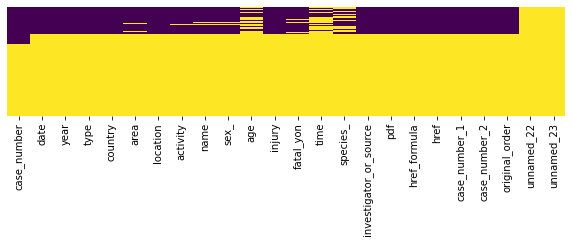

In [9]:
import pylab as plt
import seaborn as sns
plt.figure(figsize=(10,2))

sns.heatmap(df.isna(), # mapa de calor
            yticklabels=False,
            cmap='viridis',
            cbar=False)

plt.show();

In [10]:
df.fillna({'unnamed_22': 'Columna no contiene información', 'unnamed_23': 'Columna no contiene información'}, inplace=True)

In [11]:
df[df.unnamed_23.str.contains('Teramo')].head()

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_yon,time,species_,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
4415,1952.03.30,30-Mar-1952,1952.0,Unprovoked,NETHERLANDS ANTILLES,Curacao,NaN,Went to aid of child being menaced by the shark,A.J. Eggink,M,NaN,"Buttock bitten, tissue removed",N,NaN,"Bull shark, 2.7 m [9'] was captured & dragged ...","J. Randall, p.352 in Sharks & Survival; H.D. B...",1952.03.30-Eggink.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.03.30,1952.03.30,1888.0,Columna no contiene información,Teramo


In [12]:
df[df.unnamed_23.str.contains('change filename')].head()

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_yon,time,species_,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
5840,1878.09.14.R,Reported 14-Sep-1878,1878.0,Provoked,USA,Connecticut,"Branford, New Haven County",Fishing,Captain Pattison,M,NaN,Leg bitten by netted shark PROVOKED INCIDENT,N,NaN,NaN,"St. Joseph Herald, 9/14/1878",1878.09.14.R-Pattison.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1878.09.14.R,1878.09.14.R,463.0,Columna no contiene información,change filename


In [13]:
qty_of_nuls = 20
df.iloc[df[(df.isnull().sum(axis=1)>qty_of_nuls)].index]

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_yon,time,species_,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columna no contiene información,Columna no contiene información
6310,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columna no contiene información,Columna no contiene información
6311,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columna no contiene información,Columna no contiene información
6312,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columna no contiene información,Columna no contiene información
6313,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columna no contiene información,Columna no contiene información
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columna no contiene información,Columna no contiene información
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columna no contiene información,Columna no contiene información
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columna no contiene información,Columna no contiene información
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columna no contiene información,Columna no contiene información


In [14]:
df = df.drop(df[df.isnull().sum(axis=1) > 20].index)

In [15]:
df.shape

(6309, 24)

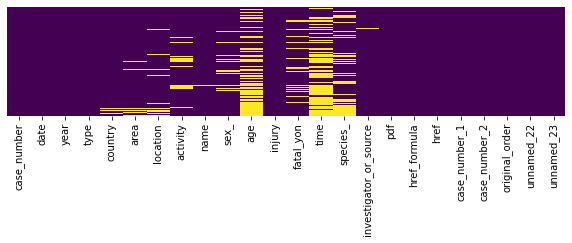

In [16]:
plt.figure(figsize=(10,2))

sns.heatmap(df.isna(), # mapa de calor
            yticklabels=False,
            cmap='viridis',
            cbar=False)

plt.show();

In [17]:
nan_cols=df.isnull().sum()
nan_cols[nan_cols>0] 

case_number                  1
date                         7
year                         9
type                        11
country                     57
area                       462
location                   547
activity                   551
name                       217
sex_                       572
age                       2838
injury                      35
fatal_yon                  546
time                      3361
species_                  2845
investigator_or_source      24
pdf                          7
href_formula                 8
href                         7
case_number_1                7
case_number_2                7
dtype: int64

In [18]:
df[df['case_number'].isnull()]

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_yon,time,species_,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
5488,NaN,Reported 06-Sep-1905,1905.0,Provoked,USA,Florida,"Fort Pierce, St Lucie County",Fishing,David Curry,M,NaN,Lacerations to leg from hooked shark PROVOKED ...,N,NaN,NaN,"Muncie Evening Press, 8/6/1913",1905.09.06.R-Curry.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.09.06.R,1905.09.06.R,815.0,Columna no contiene información,Columna no contiene información


In [19]:
df.fillna({'case_number': '1905.09.06.R'}, inplace=True)

In [20]:
df[df['date'].isnull()]

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_yon,time,species_,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
6302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6304.0,Columna no contiene información,Columna no contiene información
6303,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6305.0,Columna no contiene información,Columna no contiene información
6304,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6306.0,Columna no contiene información,Columna no contiene información
6305,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6307.0,Columna no contiene información,Columna no contiene información
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0,Columna no contiene información,Columna no contiene información
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,Columna no contiene información,Columna no contiene información
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,Columna no contiene información,Columna no contiene información


In [21]:
df = df.drop(index=[6302,6303,6304,6305,6306,6307,6308,])

In [22]:
df[df['year'].isnull()]

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_yon,time,species_,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
187,2017.01.08.R,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,35,"No attack, shark made a threat display",NaN,NaN,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,6116.0,Columna no contiene información,Columna no contiene información
6079,1836.08.19.R,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224.0,Columna no contiene información,Columna no contiene información


In [23]:
df.loc[[187],"year"]=2017
df.loc[[6079],"year"]=1836


In [24]:
df[df['type'].isnull()]

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_yon,time,species_,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
85,2017.09.15.a,15-Sep-2017,2017.0,NaN,SAMOA,Upolu Island,Nofoalii,Fishing,male,M,NaN,Injuries to hands and legs,N,Night,NaN,"Samoa Observer, 9/16/2017",2017.09.15.a-Samoa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.15.a,2017.09.15.a,6218.0,Columna no contiene información,Columna no contiene información
382,2015.07.27,27-Jul-2015,2015.0,NaN,AUSTRALIA,Victoria,Tyrendarra Beach,Surfing,male,M,40,Injury to hand,NaN,NaN,NaN,NaN,2015.07.27-Victoria.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.27,2015.07.27,5921.0,Columna no contiene información,Columna no contiene información
4867,1936.09.11.R,Reported 11-Sep-1936,1936.0,NaN,VIETNAM,NaN,Saigon,Wreck of a sampam,8 crew,M,NaN,FATAL,Y,NaN,NaN,"Lansing State Journal, 9/11/1936",1936.09.11-Saigon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1936.09.11.R,1936.09.11.R,1436.0,Columna no contiene información,Columna no contiene información
5705,1890.03.03.R,Reported 03-Mar-1890,1890.0,NaN,CEYLON,NaN,NaN,Diving,a pearl diver,M,NaN,FATAL,Y,NaN,NaN,"The Guardian, 3/3/1890",1890.03.03.R-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1890.03.03.R,1890.03.03.R,598.0,Columna no contiene información,Columna no contiene información


In [25]:
df.fillna({'type':'unknown','country':'unknown','area':'unknown','location':'unknown','activity':'unknown','name':'unknown','sex_':'unknown','age':0,'fatal_yon':'unknown','href_formula':'unknown','injury':'unknown','time':'unknown','species_':'unknown','investigator_or_source':'unknown',}, inplace=True)

In [26]:
nan_cols=df.isnull().sum()
nan_cols[nan_cols>0] 

Series([], dtype: int64)

In [27]:
df.head()

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_yon,time,species_,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,Columna no contiene información,Columna no contiene información
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,Columna no contiene información,Columna no contiene información
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,Columna no contiene información,Columna no contiene información
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,0,Minor injury to lower leg,N,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,Columna no contiene información,Columna no contiene información
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,0,Lacerations to leg & hand shark PROVOKED INCIDENT,N,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,Columna no contiene información,Columna no contiene información


# Determination of data type per column:

**case_number** --> This would be usefull for each case identification. As we have the index for identifying each case,
let's take this column as irrelevant. That is why it is not going to be cleaned. Column type will be unchanged and it 
will remain as "Object".'''

In [28]:
df.type.value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
unknown            4
Questionable       2
Boatomg            1
Name: type, dtype: int64

In [29]:
df['type']=df['type'].replace('Boating','Boat')

In [30]:
df['type']=df['type'].replace('Boatomg','Boat')

In [31]:
df.type.value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Boat             341
Sea Disaster     239
unknown            4
Questionable       2
Name: type, dtype: int64

In [32]:
df.activity.value_counts().head(50)

Surfing                    971
Swimming                   869
unknown                    544
Fishing                    431
Spearfishing               333
Bathing                    162
Wading                     149
Diving                     127
Standing                    99
Snorkeling                  89
Scuba diving                76
Body boarding               61
Body surfing                49
Swimming                    47
Kayaking                    33
Treading water              32
Pearl diving                32
Fell overboard              32
Boogie boarding             29
Free diving                 29
Windsurfing                 19
Walking                     17
Boogie Boarding             16
Shark fishing               15
Floating                    14
Fishing                     13
Canoeing                    13
Surf skiing                 12
Surf-skiing                 12
Surf fishing                12
Rowing                      12
Kayak Fishing               11
Fishing 

In [33]:
df.activity.unique()

array(['Paddling', 'Standing', 'Surfing', ...,
       'Crew swimming alongside their anchored ship',
       '4 men were bathing', 'Wreck of  large double sailing canoe'],
      dtype=object)

In [34]:
df.year.unique()

array([2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010.,
       2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.,
       2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994., 1993.,
       1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986., 1985.,
       1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975.,
       1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966., 1965.,
       1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956.,
       1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948., 1848.,
       1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939.,
       1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930.,
       1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922., 1921.,
       1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913., 1912.,
       1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904., 1903.,
       1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895., 1894.,
       1893., 1892.,

In [35]:
df['year'] = df['year'].astype('int')

In [36]:
df.year.value_counts()

2015    143
2017    137
2016    130
2011    128
2014    127
       ... 
1786      1
1785      1
1784      1
1783      1
1815      1
Name: year, Length: 249, dtype: int64

In [37]:
df.country.value_counts()

USA                      2229
AUSTRALIA                1338
SOUTH AFRICA              579
PAPUA NEW GUINEA          134
NEW ZEALAND               128
                         ... 
THE BALKANS                 1
NORTH ATLANTIC OCEAN        1
MAYOTTE                     1
GABON                       1
CEYLON (SRI LANKA)          1
Name: country, Length: 213, dtype: int64

In [38]:
df.country.unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', 'unknown', 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 

In [39]:
df.sex_.value_counts()

M          5094
F           637
unknown     565
M             2
N             2
lli           1
.             1
Name: sex_, dtype: int64

In [40]:
df['sex_']=df['sex_'].replace('M ','M')

In [41]:
df['sex_']=df['sex_'].replace('N','M')

In [42]:
df['sex_']=df['sex_'].replace('lli','unknown')

In [43]:
df['sex_']=df['sex_'].replace('.','unknown')

In [44]:
df.sex_.value_counts()

M          5098
F           637
unknown     567
Name: sex_, dtype: int64

In [45]:
df.fatal_yon.value_counts()

N          4293
Y          1388
unknown     539
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: fatal_yon, dtype: int64

In [46]:
df['fatal_yon']=df['fatal_yon'].replace('UNKNOWN','unknown')

In [47]:
df['fatal_yon']=df['fatal_yon'].replace(' N','N')

In [48]:
df['fatal_yon']=df['fatal_yon'].replace('M','N')

In [49]:
df['fatal_yon']=df['fatal_yon'].replace('N ','N')

In [50]:
df['fatal_yon']=df['fatal_yon'].replace('y','Y')

In [51]:
df['fatal_yon']=df['fatal_yon'].replace('2017','unknown')

In [52]:
df.fatal_yon.value_counts()

N          4302
Y          1389
unknown     611
Name: fatal_yon, dtype: int64

In [53]:
df.species_.value_counts()

unknown                                                                                                                          2838
White shark                                                                                                                       163
Shark involvement prior to death was not confirmed                                                                                105
Invalid                                                                                                                           102
Shark involvement not confirmed                                                                                                    88
                                                                                                                                 ... 
1.2 m to 1.5 m [4.5' to 5'] shark                                                                                                   1
Bull shark, 2.3 m [7.5']                                      

In [54]:
df.species_.unique()

array(['White shark', 'unknown', '2 m shark', ..., "12' tiger shark",
       'Blue pointers',
       'Said to involve a grey nurse shark that leapt out of the water and  seized the boy but species identification is questionable'],
      dtype=object)

In [55]:
df.head()

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_yon,time,species_,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
0,2018.06.25,25-Jun-2018,2018,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,Columna no contiene información,Columna no contiene información
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,Columna no contiene información,Columna no contiene información
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,Columna no contiene información,Columna no contiene información
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,0,Minor injury to lower leg,N,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,Columna no contiene información,Columna no contiene información
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,0,Lacerations to leg & hand shark PROVOKED INCIDENT,N,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,Columna no contiene información,Columna no contiene información


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             6302 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6302 non-null   int32  
 3   type                    6302 non-null   object 
 4   country                 6302 non-null   object 
 5   area                    6302 non-null   object 
 6   location                6302 non-null   object 
 7   activity                6302 non-null   object 
 8   name                    6302 non-null   object 
 9   sex_                    6302 non-null   object 
 10  age                     6302 non-null   object 
 11  injury                  6302 non-null   object 
 12  fatal_yon               6302 non-null   object 
 13  time                    6302 non-null   object 
 14  species_                6302 non-null   

In [57]:
df.shape

(6302, 24)

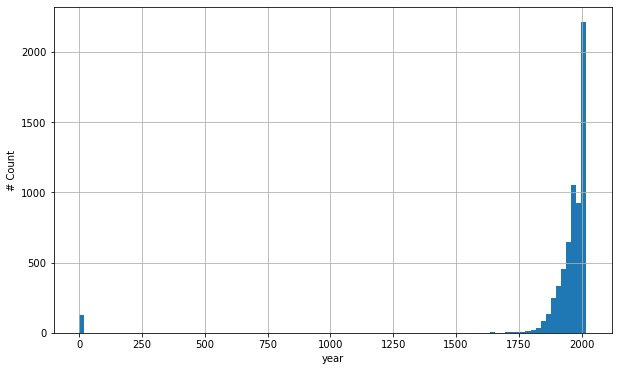

In [58]:
plt.figure(figsize=(10, 6))

df.year.hist(bins=100)

plt.ylabel('# Count')
plt.xlabel('year');

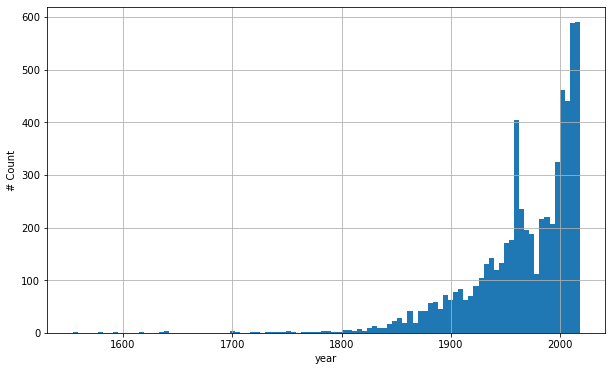

In [59]:
plt.figure(figsize=(10, 6))

data=df[df.year>1550].year

data.hist(bins=100)

plt.ylabel('# Count')
plt.xlabel('year');

## Insigt Nº1

Conclusión: sesgo temporal. No han incrementado los ataques de tiburones a lo largo de los años. Simplemente hay más datos.

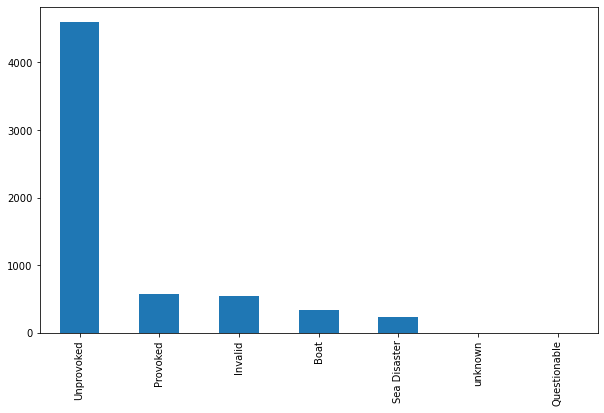

In [60]:
plt.figure(figsize=(10, 6))

df.type.value_counts().plot.bar();

## Insight Nº2

Conclusión: La gran mayoría de los ataques son no provocados. El tiburón ataca por propia supervivencia. No porque alguien le ataque.

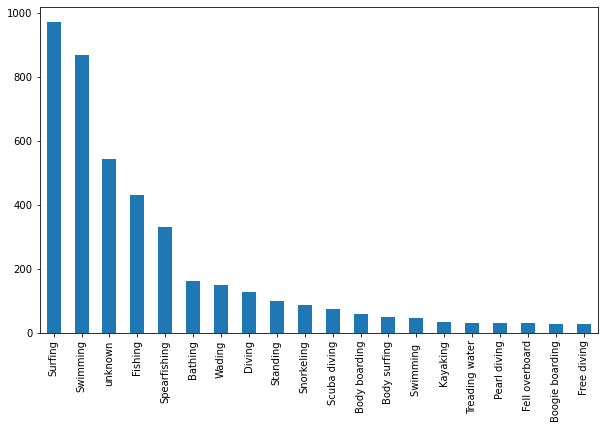

In [61]:
plt.figure(figsize=(10, 6))

df.activity.value_counts().head(20).plot.bar();

## Insight Nº3

Conclusión: Los ataques se producen mientras la víctima realiza una actividad en el medio natural de los tiburones: el mar.

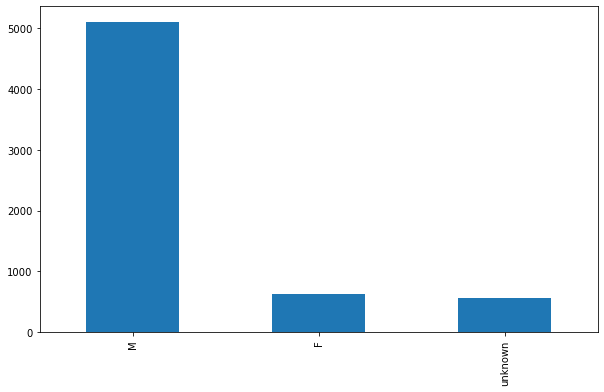

In [62]:
plt.figure(figsize=(10, 6))

df.sex_.value_counts().plot.bar();

## Insight Nº4

Conclusión: La gran mayoría de las victimas son de sexo masculino. Esto no significa que la comida preferida de los tiburones sean hombres. Sino porque los deportes marinos son practicados principalmente por hombres: